# 6.1 매개변수 갱신
신경망 학습의 목적은 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다. 이는 곧 매개변수의 최적값을 찾는 문제이며, 이러한 문제를 푸는 것을 **최적화(optimization)**라 한다.

## 6.1.2 확률적 경사 하강법(SGD)
SGD는 수식으로는 다음과 같다.<br><br>
<img src="https://velog.velcdn.com/images/jw5150/post/77cac17b-0251-4eee-9a74-7fa6f8b99d8c/image.png"></img><br><br> 
여기에서 W는 갱신할 가중치 배개변수고 ∂L/∂W는 W에 대한 손실 함수의 기울기이다. η(에타)는 학습률을 의미한다. ← 는 우변의 값으로 좌변의 값을 갱신한다는 뜻이다.<br>
SGD는 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법이다. 코드로 구현해보자.

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

lr은 learning rate(학습률)을 뜻한다. 이 학습률을 인스턴스 변수로 유지한다. update(params, grads) 메서드는 SGD 과정에서 반복해서 불린다. 인수인 params와 grads는 딕셔너리 변수이다. params['W1'], grads['W1'] 등과 같이 각각 가중치 매개변수와 기울기를 저장하고 있다.

## 6.1.3 SGD의 단점
SGD는 단순하고 구현도 쉽지만, 문제에 따라서 비효율적일 때가 있다. 아래와 같은 함수가 있다고 하자<br><Br>
<img src="https://velog.velcdn.com/images/jw5150/post/3c8e469e-282e-4153-8c6f-98836c67c2bc/image.png"></img><br><br> 

이 함수는 아래와 같이 생겼다.<br><br>
<img src="https://velog.velcdn.com/images/jw5150/post/c55606ba-0014-46b8-9677-b2192b1ccd07/image.png" width="1000px" height="400px"></img><br><br>
왼쪽은 그래프이고 오른쪽은 등고선이다. <br>
기울기를 그려보면 아래와 같다.<BR><BR>
<img src="https://velog.velcdn.com/images/jw5150/post/b041e2ea-6ce2-41a3-8a78-34c0782a3205/image.png" width="500px" height="500px"></img><br><br>
이 기울기는 y축 방향은 크고, x축 방향은 작다는 것이 특징이다. 말하자면 y축 방향은 가파른데 x축 방향은 완만한 것이다. 또 함수가 최솟값이 되는 장소는 (x, y) = (0, 0)이지만, 기울기 그림이 보여주는 기울기 대부분은 (0, 0) 방향을 가리키지 않는다.<br><BR>
이 함수에 SGD를 적용해보자<br>
탐색을 시작하는 장소(초깃값)는 (x, y) = (-7.0, 2.0)으로 하자. 결과는 아래와 같다.<BR><BR> 
<img src="https://velog.velcdn.com/images/jw5150/post/4ad539ac-5be9-4867-a5ce-923d407dc4c6/image.png" width="500px" height="500px"></img><br><br>
최솟값인 (0, 0) 까지 지그재그로 이동하니 비효율적이다. SGD의 단점은 비등방성(anisotropy) 함수(방향에 따라 성질, 즉 여기에서는 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이다. 이럴 때는 SGD 같이 무작정 기울어진 방향으로 진행하는 단순한 방식보다 더 영리한 묘안이 간절해진다. 또한 SGD가 지그재그로 탐색하는 근본 원인은 기울어진 방향이 본래의 최솟값과 다른 방향을 가리켜서라는 점도 생각해볼 필요가 있다.

## 6.1.4 모멘텀
**모멘텀(Momentum)**은 '운동량'을 뜻하는 단어로, 물리와 관계까 있다. 수식은 다음과 같다.<br><BR>
<img src="https://velog.velcdn.com/images/jw5150/post/745cdb62-b302-4c04-b342-f258eff13df9/image.png"></img><br>
<img src="https://velog.velcdn.com/images/jw5150/post/6ece9661-7358-49d2-9cc7-b337039cdd8b/image.png"></img><br><br> 
W는 갱신할 가중치 매개변수, ∂L/∂W는 W에 대한 손실 함수의 기울기, η는 학습률을 의미한다.<br>
v는 물리에서 말하는 속도(velocity)에 해당한다. 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 나타낸다. <br>
αv 항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다(α는 0.9 등의 값으로 설정한다.). 물리에서의 지면 마찰이나 공기 저항에 해당한다.<bR><BR>
<img src="https://velog.velcdn.com/images/jw5150/post/c684ee49-e3cf-416d-a2c2-a192a78c98e7/image.png"></img><br><br>


In [2]:
import numpy as np

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

이제 모멘텀을 활용하여 아래의 식의 최적화 문제를 풀어보자<br><br>
<img src="https://velog.velcdn.com/images/jw5150/post/3c8e469e-282e-4153-8c6f-98836c67c2bc/image.png"></img><br><br> 
그럼 아래와 같이 최적화 갱신 경로가 나온다.<br><br>
<img src="https://velog.velcdn.com/images/jw5150/post/3bd3bade-251c-4787-9d0c-16d657af4e33/image.png" width="700px" height="500px"></img><br><br> 
SGD와 비교했을 때 '지그재그 정도'가 덜한 것을 알 수 있다. x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다. 거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않다.<BR> 전체적으로 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어든다.


## 6.1.5 AdaGrad
신경망에서 학습률(η) 값이 중요하다. η가 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다.<Br><br>
이 학습률을 정하는 효과적 기술로 **학습률 감소(learning rate decay)**가 있다. 이는 학습을 진행하면서 학습률을 점차 줄여가는 방법이다. 처음에는 크게 학습하다가 조금씩 작게 학습한다는 얘기이다. <br><BR>
학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 '전체'의 학습률 값을 일괄적으로 낮추는 것이다. 이를 더욱 발전시킨 것이 **AdaGrad**이다. AdaGrad는 '각각의' 매개변수에 '맞춤형' 값을 만들어준다. <Br><br>
AdaGrad는 개별 매개변수에 적응적으로(adaptive) 학습률을 조정하면서 학습을 진행한다. AdaGrad의 갱신 방법은 수식으로는 다음과 같다.<br><bR>
<img src="https://velog.velcdn.com/images/jw5150/post/b08d2a8d-6aff-488c-a5b7-f25a4412cb83/image.png"></img><br>
<img src="https://velog.velcdn.com/images/jw5150/post/147bc6f8-eea1-4670-83f2-fd5ac42a20d8/image.png"></img><br><br> 
h는 기존 기울기 값을 제곱하여 계속 더해준다.(⊙기호는 행렬의 원소별 곱셈(element-wise product)을 의미한다.)<BR><BR>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdjfLd5%2FbtroeALhR7O%2F3sPOdkaq1F5JFf3my8DeBk%2Fimg.png" width="750px" height="500px"></img><br><br> 

그리고 매개변수를 갱신할 때 1/sqrt(h)을 곱해 학습률을 조정한다. 매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻인데, 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻한다.<Br><BR>

**NOTE_** AdaGrad는 과거의 기울기를 제곱하여 계속 더해간다. 그래서 학습을 진행할수록 갱신 강도가 약해진다. 실제로 무한히 계속 학습한다면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게 된다. 이 문제를 개선한 기법으로 RMSProp라는 방법이 있다. RMSProp는 과거의 모든 기울기를 균일하게 더해가는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다. 이를 **지수이동평균(Exponential Moving Average, EMA)**라고 하며, 과거 기울기의 반영 규모를 기하급수적으로 감소시킨다.

In [3]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

마지막 줄에서 1e-7이라는 작은 값을 더한다. 이 값은 self.h[key]에 0이 담겨 있다 해도 0으로 나눠지는 사태를 막아준다.<BR><BR>
<img src="https://velog.velcdn.com/images/jw5150/post/3c8e469e-282e-4153-8c6f-98836c67c2bc/image.png"></img><br><br> 
위 식을 AdaGrad를 사용해서 최적화 문제를 풀어보자. 결과는 아래와 같다.<br><br>
<img src="https://velog.velcdn.com/images/jw5150/post/35b920ae-357a-4d83-886b-ce22f585fe8f/image.png"  width="700px" height="500px"></img><br><br> 
위 그림을 보면 최솟값을 향해 효율적으로 움직이는 것을 알 수 있다. y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고, 지그재그 움직임이 줄어든다.

## 6.1.6 Adam
모멘텀과 AdaGrad를 합친 것이 Adam이다. 매개변수 공간을 효율적으로 탐색해주고, 하이퍼파라미터의 '편향 보정'이 진행된다.<BR><BR>

<img src="https://velog.velcdn.com/images/jw5150/post/3c8e469e-282e-4153-8c6f-98836c67c2bc/image.png"></img><br><br> 
위 식을 Adam을 사용해서 최적화 문제를 풀어보자. 결과는 아래와 같다.<br><br>
<img src="https://velog.velcdn.com/images/jw5150/post/2a96ce9d-78e8-4712-8825-a59632204089/image.png"  width="700px" height="500px"></img><br><br> 
모멘텀 때보다 좌우 흔들림이 적다. 이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택이다.
<br><BR>
**NOTE_** Adam은 하이퍼파라미터를 3개 설정한다. 하나는 지금까지의 학습률(논문에서는 α로 등장), 나머지 두개는 일차 모멘텀용 계수 β1과 이차 모멘텀용 계수 β2이다. 논문에 따르면 기본 설적값은 β1은 0.9, β2는 0.999이며, 이 값이면 많은 경우에 좋은 결과를 얻을 수 있다.

## 6.1.7 어느 갱신 방법을 이용할 것인가?
지금까지 매개변수의 갱신 방법을 4개 알아봤다. 이 네 기법의 결과를 비교해보자.<br><BR>
<img src="https://velog.velcdn.com/images/jw5150/post/b48bf542-e9b9-4616-9c3c-dfb44524677d/image.png" width="1000px" height="800px"></img><br><br> 
사용한 기법에 따라 갱신 경로가 다르다. 이 그림만 보면 AdaGrad가 가장 나은거 같은데, 사실 그 결과는 풀어야 할 문제가 무엇이냐에 따라 달라지므로 주의해야 한다. 학습률과 같은 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀐다. <bR><BR>
네 기법 중 어떤 것이 가장 뛰어나냐 물어보면 정답은 없다. 풀어야 하는 문제에 맞게 optimization을 채택해야한다.

## 6.1.8 MNIST 데이터셋으로 본 갱신 방법 비교


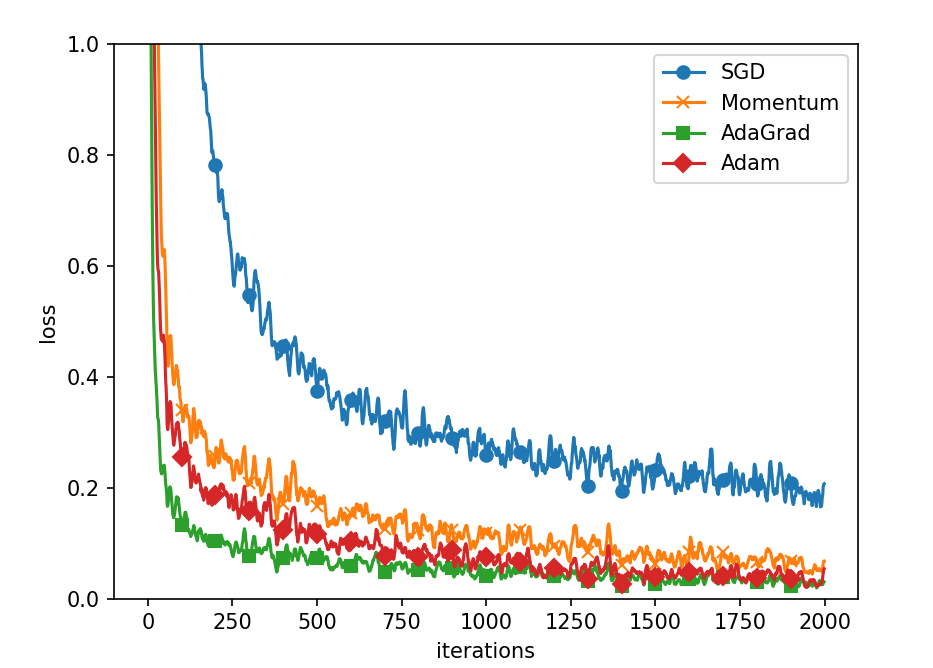<BR><BR>
위 그림은 MNIST 데이터셋으로 optimizer를 비교한 결과이다. 각 층이 100개의 뉴런으로 구성된 5층 신경망에서 ReLU를 활성화 함수로 사용했다. <BR><BR>
결과를 보면 SGD의 학습 진도가 가장 느리다. 나머지 세 기법의 진도는 비슷한데, 잘 보면 AdaGrad가 조금 더 빠른 것 같다. 이 실험에서 주의할 점은 하이퍼파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라진다는 점이다. 다만 일반적으로 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타난다.

# 6.2 가중치의 초깃값